In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('ford.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [7]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

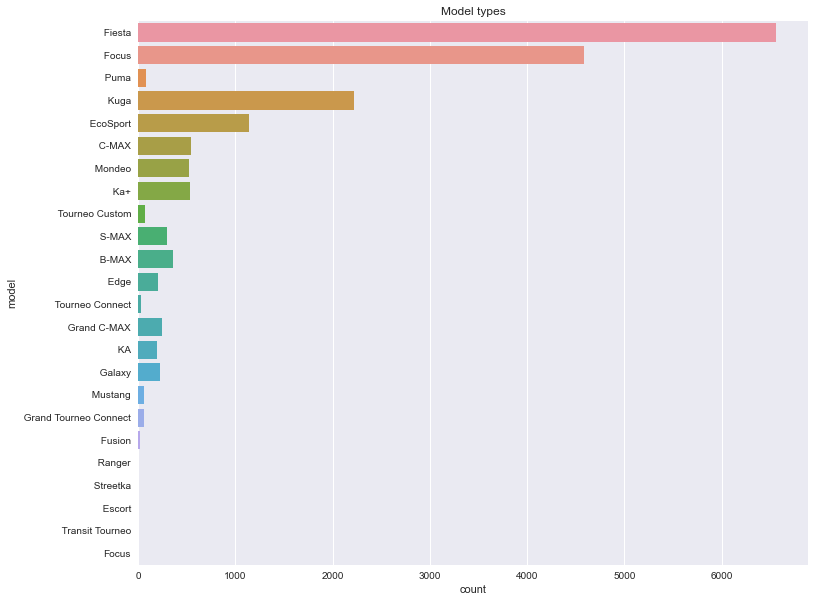

In [8]:
plt.figure(figsize=(12,10))
sns.countplot(y='model', data=df)
plt.title('Model types')
plt.show()

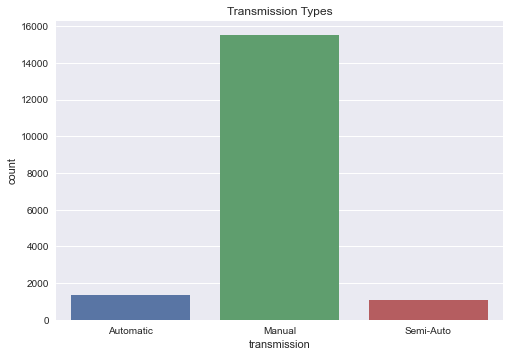

In [9]:
sns.countplot(x='transmission', data=df)
plt.title('Transmission Types')
plt.show()

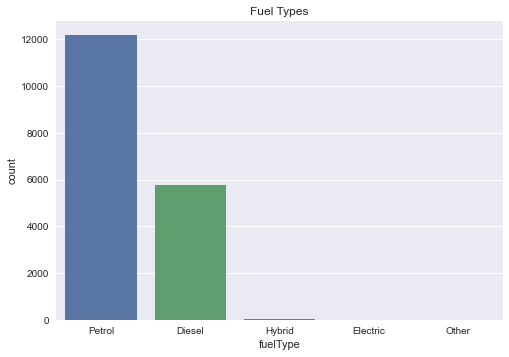

In [10]:
sns.countplot(x='fuelType', data=df)
plt.title('Fuel Types')
plt.show()

In [11]:
print(df['model'].value_counts())
print("\n\n")
print(df['transmission'].value_counts())
print("\n\n")
print(df['fuelType'].value_counts())

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64



Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64



Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64


<AxesSubplot:xlabel='transmission', ylabel='price'>

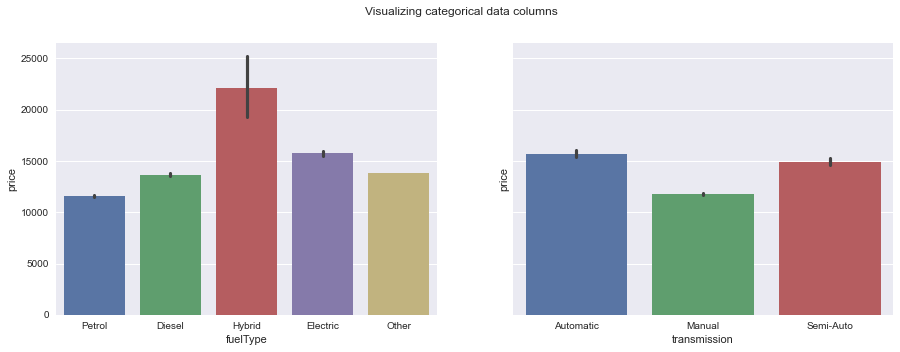

In [12]:
fuelType = df['fuelType']
transmission = df['transmission']
price = df['price']
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical data columns')
sns.barplot(x=fuelType, y=price, ax=axes[0])
sns.barplot(x=transmission, y=price, ax = axes[1])

In [13]:
df.replace({'transmission':{'Manual':0, 'Automatic':1, 'Semi-Auto':2}}, inplace=True)
df.replace({'fuelType':{'Petrol':0, 'Diesel':1, 'Hybrid':2, 'Electric':3, 'Other':4}}, inplace=True)

In [14]:
df = df.drop("model", axis=1)
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,1,15944,0,150,57.7,1.0
1,2018,14000,0,9083,0,150,57.7,1.0
2,2017,13000,0,12456,0,150,57.7,1.0
3,2019,17500,0,10460,0,145,40.3,1.5
4,2019,16500,1,1482,0,145,48.7,1.0


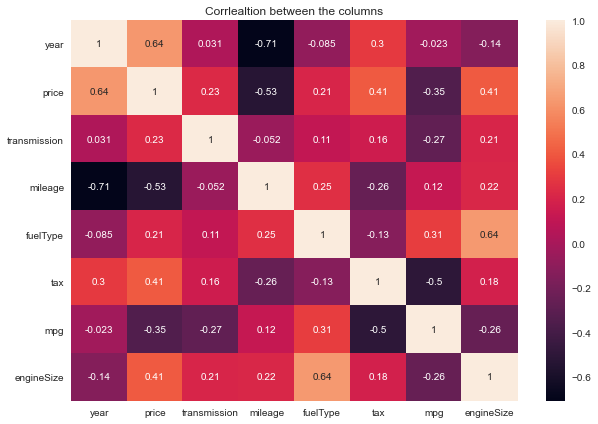

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Corrlealtion between the columns')
plt.show()

In [16]:
df.corr()['price'].sort_values()

mileage        -0.530659
mpg            -0.346419
fuelType        0.209225
transmission    0.231806
tax             0.406857
engineSize      0.411178
year            0.636009
price           1.000000
Name: price, dtype: float64

<AxesSubplot:title={'center':'Correlation between year and price'}, xlabel='price', ylabel='year'>

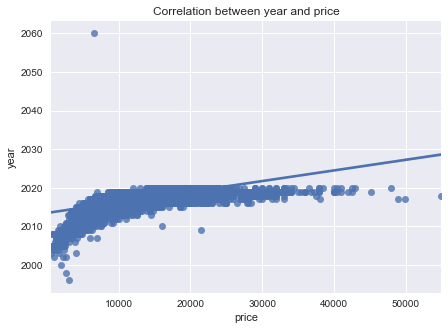

In [17]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between year and price')
sns.regplot(x='price', y='year', data=df)

In [18]:
X = df.drop('price', axis=1)
y = df['price']

In [19]:
print("Shape of X is :", X.shape)
print("Shape of y is :", y.shape)

Shape of X is : (17966, 7)
Shape of y is : (17966,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
print("Shape of X_train is: ", X_train.shape)
print("Shape of y_train is: ", y_train.shape)
print("Shape of X_test is: ", X_test.shape)
print("Shape of y_test is: ", y_test.shape)

Shape of X_train is:  (12576, 7)
Shape of y_train is:  (12576,)
Shape of X_test is:  (5390, 7)
Shape of y_test is:  (5390,)


In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

In [25]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("MAE of linear regression model is:", linreg_mae)
print("R2 score of linear regression model is:", linreg_r2)

MAE of linear regression model is: 1768.491372030521
R2 score of linear regression model is: 0.7312941373144217


In [26]:
linreg_score = cross_val_score(linreg, X_test, y_test, cv=4)
print("Linear Regression model accuracy is: {}".format(linreg_score.mean()*100))

Linear Regression model accuracy is: 72.99508724346919


In [27]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [28]:
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print("MAE of decision tree model is:", dtree_mae)
print("R2 score of decision tree model is:", dtree_r2)

MAE of decision tree model is: 1204.3982065553496
R2 score of decision tree model is: 0.8491328892171692


In [29]:
dtree_score = cross_val_score(dtree, X_test, y_test, cv=4)
print("Decision Tree model accuracy is: {}".format(dtree_score.mean()*100))

Decision Tree model accuracy is: 81.89415648932933


In [31]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [32]:
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("MAE of xgboost model is:", xgb_mae)
print("R2 score of xgboost model is:", xgb_r2)

MAE of xgboost model is: 935.9604099931876
R2 score of xgboost model is: 0.9115437782013224


In [33]:
xgb_score = cross_val_score(xgb, X_test, y_test, cv=4)
print("Decision Tree model accuracy is: {}".format(xgb_score.mean()*100))

Decision Tree model accuracy is: 89.18162287421569


In [34]:
df.columns

Index(['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [35]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,1,15944,0,150,57.7,1.0
1,2018,14000,0,9083,0,150,57.7,1.0
2,2017,13000,0,12456,0,150,57.7,1.0
3,2019,17500,0,10460,0,145,40.3,1.5
4,2019,16500,1,1482,0,145,48.7,1.0


In [36]:
data = {'year':2017, 'transmission':1, 'mileage':15944, 'fuelType':0, 'tax':150, 'mpg':57.7,
       'engineSize':1.0}
index= [0]
new_df = pd.DataFrame(data, index)
new_df

,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,1,15944,0,150,57.7,1.0


In [37]:
new_pred = xgb.predict(new_df)
print("The car price for the new data is: ", new_pred)

The car price for the new data is:  [12532.798]
